In [1]:
"""
July 7, 2020

Looking at results of the MCMCs.
"""

import ares
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import distpy

In [2]:
# Independent variables
redshifts = np.sort(np.array([0.10165, 0.25,    0.35 ,   0.45,    0.575,   0.725,   0.875,   0.9,     ]))
#1.125, 1.65,    1.75,    2.25,    2.5,   ]))#  2.75,    3.5,  ]))

Ms = np.linspace(7, 12, 60)

# blob 1: the smf
blob_n1 = ['galaxy_smf']
blob_i1 = [('z', redshifts), ('logbins', Ms)]
blob_f1 = ['StellarMassFunction']

# blob 2: the sfrd
blob_n2 = ['galaxy_sfrd']
blob_i2 = [('z', redshifts)]
blob_f2 = ['SFRD']

In [3]:
# anl = ares.analysis.ModelSet('MCMC_files/blob_test1')
# anl = ares.analysis.ModelSet('..\Cedar\savedFits/smf_24_07_13-20_0.0-4.0')
# anl = ares.analysis.ModelSet('..\Cedar\savedFits/smf_27_07_09-48_0.0-3.0') #old M
anl = ares.analysis.ModelSet('..\Cedar\savedFits/smf_28_07_13-05_0.0-4.0') #new M


labels = \
{
    'pq_func_par0[0]': 'beta_0',
    'pq_func_par2[0]': 'beta_1', 

    #norm
    'pq_func_par0[1]': 'N_0',
    'pq_func_par2[1]': 'nu', 

    #gamma
    'pq_func_par0[2]': 'gamma_0',
    'pq_func_par2[2]': 'gamma_1', 

    #peak mass
    'pq_func_par0[3]': 'logM_0',
    'pq_func_par2[3]': 'mu', 
}

anl.custom_labels = labels

# anl.skip = 5000


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : ..\Cedar\savedFits/                                                                    ####
#### prefix      : smf_28_07_13-05_0.0-4.0                                                                ####
#### N-d         : 8                                                                                      ####


In [6]:
# data = anl.ExtractData(['galaxy_smf', 'galaxy_sfrd'])
# print(data['galaxy_smf'])
# print(data['galaxy_sfrd'][0])

# print(data)

# Loading ..\Cedar\savedFits/smf_28_07_13-05_0.0-4.0.dd*.chain.pkl...
# Loaded ..\Cedar\savedFits/smf_28_07_13-05_0.0-4.0.dd*.chain.pkl in 0.37 s.
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0000.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0001.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0002.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0003.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0004.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0005.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0006.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0007.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0008.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0009.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_2

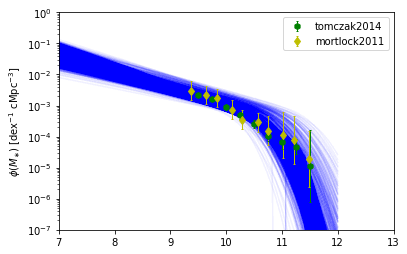

In [7]:
#look at the raw LF samples

z = 2.75

gpop = ares.analysis.GalaxyPopulation()

ax = anl.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='b', alpha=0.01)

# Plot any data within dz=0.1 of z=6
gpop.PlotSMF(z, ax=ax, round_z=0.2, log10Mass=True)

# ax.set_ylim(1e-35, 1)
# ax.set_xlim(1e7, 1e13)

ax.legend()
pl.show()

In [4]:
params = \
['pq_func_par0[0]',
    'pq_func_par2[0]',

    #norm
    'pq_func_par0[1]',
    'pq_func_par2[1]', 

    #gamma
    'pq_func_par0[2]',
    'pq_func_par2[2]', 

    #peak mass
    'pq_func_par0[3]',
    'pq_func_par2[3]' 
]

0 of 44800 chain elements ignored because of chain links with inf's/nan's.


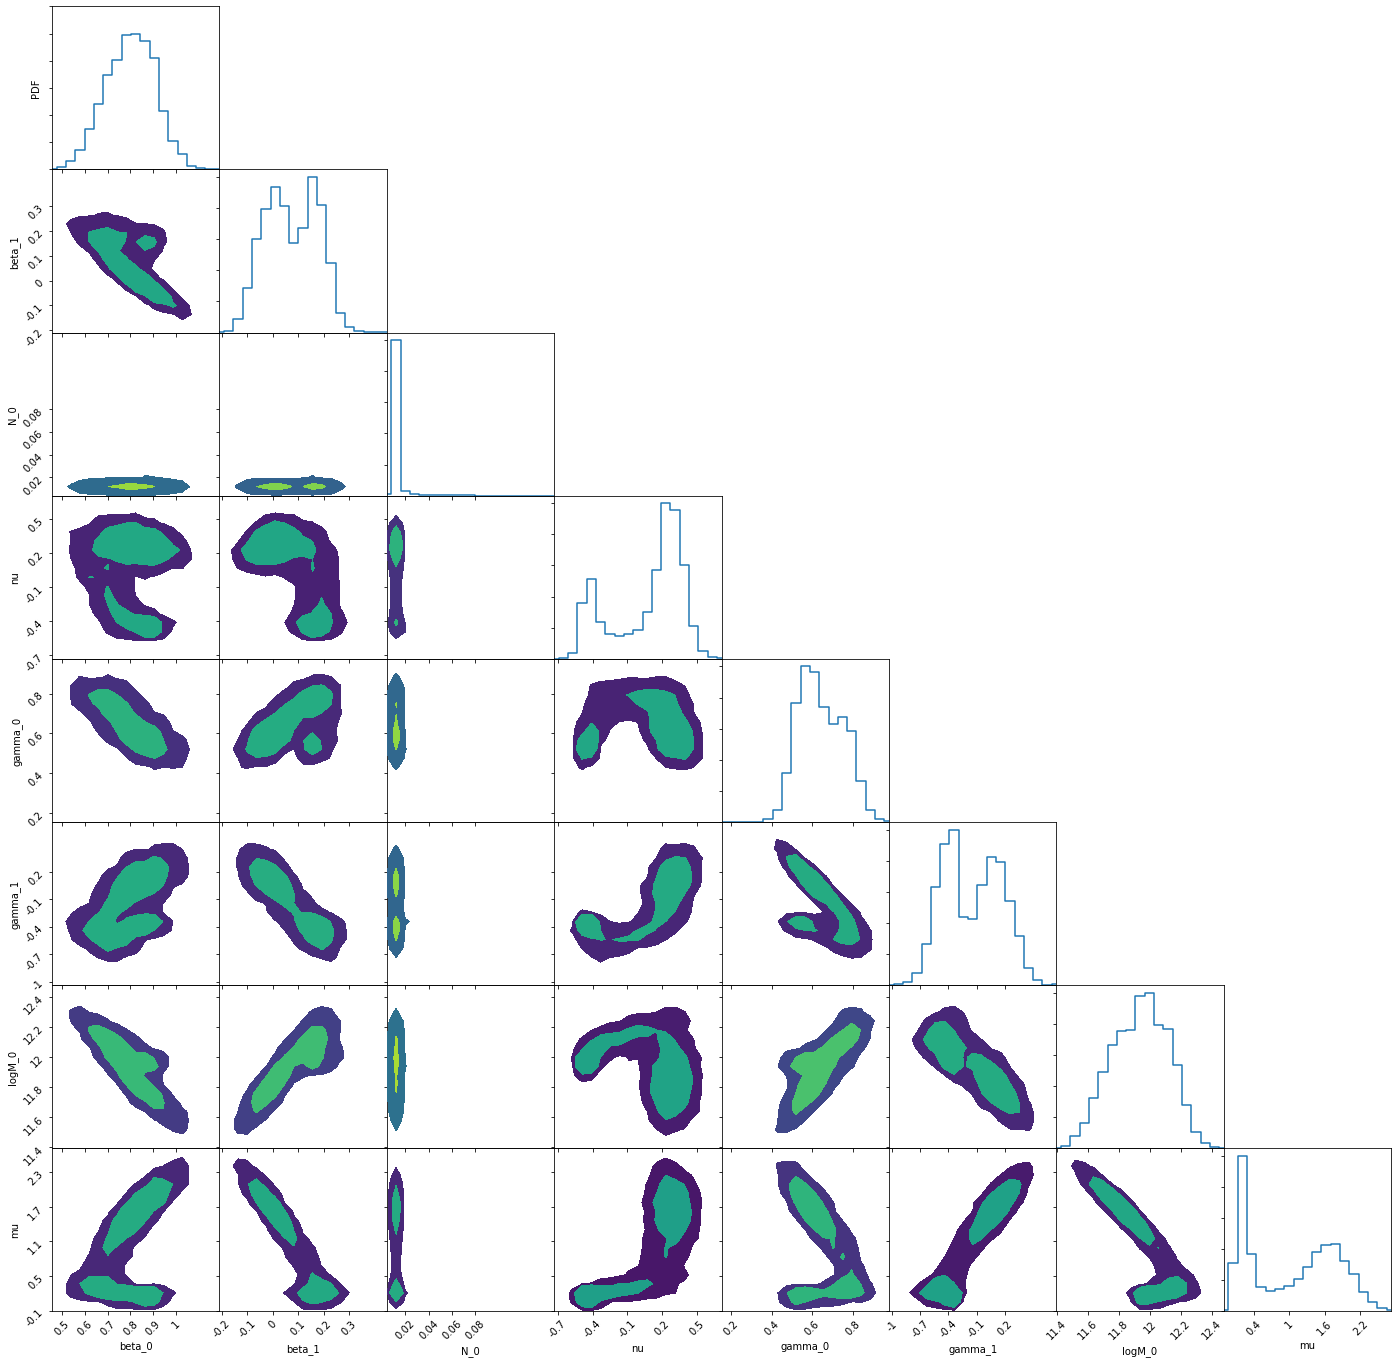

In [9]:
trig = anl.TrianglePlot(pars=params, color_by_like=True)

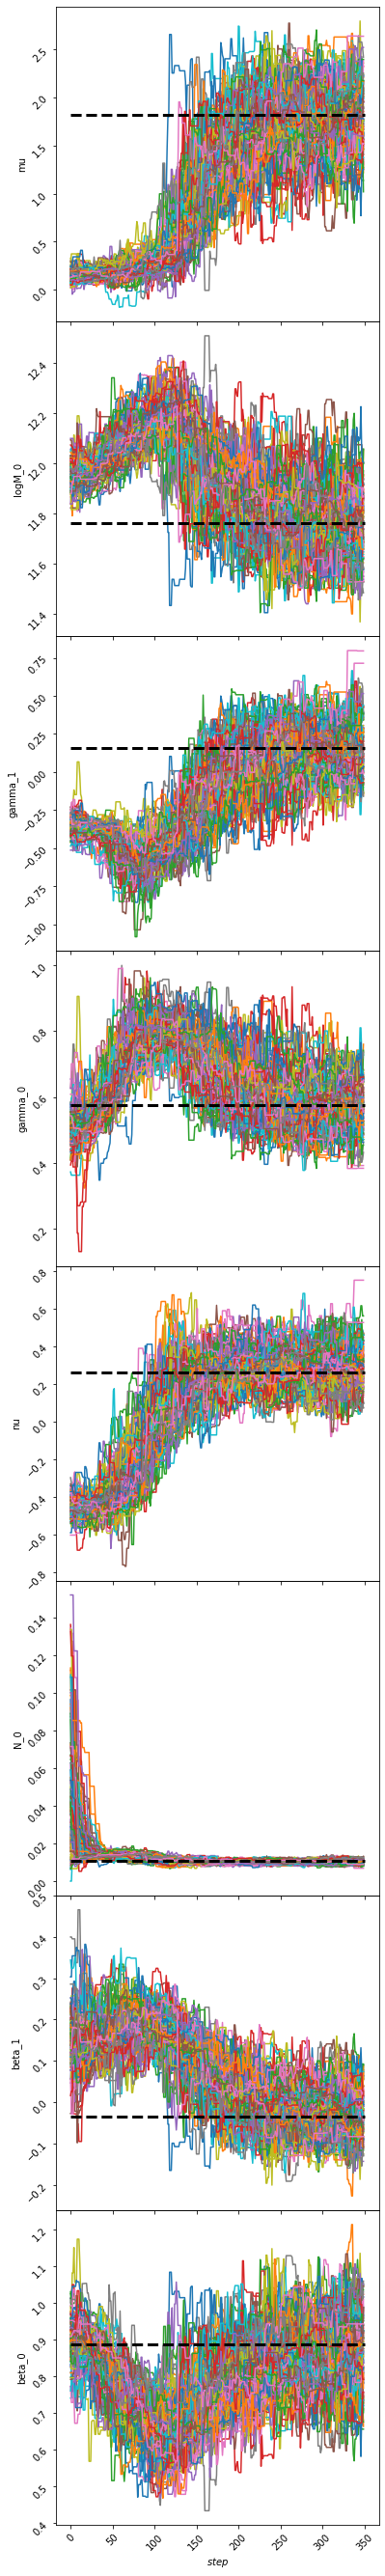

In [10]:
anl.WalkerTrajectoriesMultiPlot(best_fit='mode')

In [5]:
# print(anl.max_likelihood_parameters())

covar = anl.CovarianceMatrix(params)

# Loading ..\Cedar\savedFits/smf_28_07_13-05_0.0-4.0.dd*.chain.pkl...
# Loaded ..\Cedar\savedFits/smf_28_07_13-05_0.0-4.0.dd*.chain.pkl in 0.32 s.


In [6]:
pars_ch = {}
for i in range(len(covar[0])):
    pars_ch[params[i]] = covar[0][i]
    
pars_mean = ares.util.ParameterBundle("emma:model1")

pars_mean.update(pars_ch)
# print(pars_best)
pop_mean = ares.populations.GalaxyPopulation(**pars_mean)

In [7]:
fit_best_like = anl.max_likelihood_parameters()

fit_best_median = anl.max_likelihood_parameters()

# print(fit_best_like)

for i in range(len(covar[0])):
#     print(fit_best_like[params[i]])
    print(anl.get_1d_error(params[i], peak="mode")) #(maximum likelihood value, positive error, negative error).
#     print(params[i], anl.get_1d_error(params[i], peak="mode")[0])
    fit_best_median[params[i]] = anl.get_1d_error(params[i], peak="median")[0]


# mode gives bad errors but same val as max_li
# median gives fine errors, different vals

# print(fit_best_like) 
# print(fit_best_median)

29957
29957
(0.8854828339956649, array([0.02169952, 0.19744275]))
(-0.03544067361534682, array([0.22114799, 0.00058672]))
(0.010694171683833216, array([0.00281725, 0.00113211]))
(0.25904600040689546, array([0.08996022, 0.63537811]))
(0.575042624200754, array([0.19333286, 0.04173549]))
(0.1557654617234981, array([0.03091109, 0.62610486]))
(11.761829288924874, array([0.36164781, 0.01780803]))
(1.823825596651966, array([0.03452743, 1.64256787]))


In [9]:
pars_best = ares.util.ParameterBundle("emma:model1")

# print(fit_best_like)

pars_best.update(fit_best_like)
# print(pars_best)
pop_best = ares.populations.GalaxyPopulation(**pars_best)

pars_best_median = ares.util.ParameterBundle("emma:model1")
pars_best_median.update(fit_best_median)
pop_best_median = ares.populations.GalaxyPopulation(**pars_best_median)

# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.
# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.
# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.


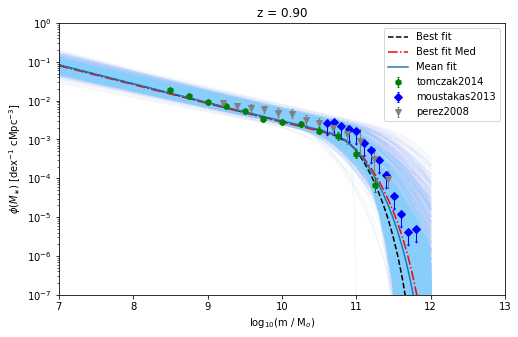

In [29]:
z = 0.9

fig, ax = pl.subplots(figsize=(8, 5))
Ms_short = np.linspace(7, 12, 80)

ls_best = pop_best.StellarMassFunction(z, Ms_short)
ls_med = pop_best_median.StellarMassFunction(z, Ms_short)

# print(ls_best)

ls_mean = pop_mean.StellarMassFunction(z, Ms_short)

ax = anl.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='lightskyblue', alpha=0.01, ax=ax)

obslf = ares.analysis.GalaxyPopulation()
obslf.PlotSMF(z=z, ax=ax, round_z=0.2, log10Mass=True)

pl.semilogy(Ms_short, ls_best, label='Best fit', color='black', ls="--")
pl.semilogy(Ms_short, ls_med, label='Best fit Med', ls="-.", color="red")

pl.semilogy(Ms_short, ls_mean, label='Mean fit')

pl.title("z = %.2f" %z)
pl.xlabel("log$_{10}$(m / M$_o$)")
pl.legend()
# pl.ylim(1e-15, 1e2)
pl.show()

(1.823825596651966, array([0.03452743, 1.64256787]))
1.823825596651966


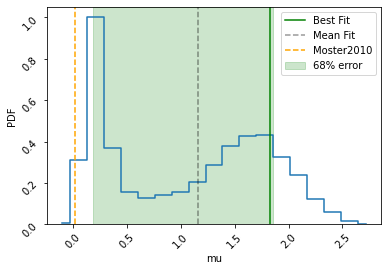

In [30]:

bests = [anl.get_1d_error(i, nu=0.68,  peak='mode') for i in params]
means = [anl.get_1d_error(i, nu=0.68,  peak='median') for i in params]
fit_best_like 

i = 7
print(bests[i])

# anl.get_1d_error(params[i], peak="median")

pars = ares.util.ParameterBundle("emma:model1")

print(fit_best_like[params[i]])
# pars_mean[params[i]]

ax = anl.PosteriorPDF(pars=params[i])

# pl.axvline(x=fit_best_like[params[i]], ls="-", color="red", label="Best Fit in range")

#best fit with mode
pl.axvline(x=bests[i][0], ls="-", color="green", label="Best Fit")
ax.axvspan(bests[i][0]-bests[i][1][1], bests[i][0]+bests[i][1][0], alpha=0.2, color='green' ,label="68% error")

#best fit with mode
# pl.axvline(x=bests_m[i][0], ls="-", color="purple", label="Best Fit Med")
# ax.axvspan(bests_m[i][0]-bests_m[i][1][1], bests_m[i][0]+bests_m[i][1][0], alpha=0.2, color='purple' ,label="68% error")

pl.axvline(x=means[i][0], ls="--", color="black", label="Mean Fit",  alpha=0.4)

pl.axvline(x=pars[params[i]], ls="--", color="orange", label="Moster2010",  alpha=1)

pl.legend()
pl.show()

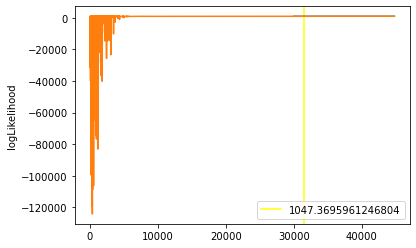

In [17]:
ticks = np.linspace(0, len(anl.logL)-1, len(anl.logL))

xstart = 30000

maxL = anl.logL[31549]

# print(anl.logL[35314])
# print(anl.logL[1344-10:1344+10])

pl.axvline(x=31549, color="yellow", label=str(maxL))

pl.plot(ticks[xstart:], anl.logL[xstart:])
pl.plot(ticks, anl.logL)
pl.ylabel("logLikelihood")

# pl.ylim(-500, 1500)
pl.legend()
pl.show()

In [ ]:
Zs = np.linspace(0, 7, 50)

import UsefulHODFunctions as UHF
csfrs, err = UHF.getCsfrsData()

ax = anl.ReconstructedFunction('galaxy_sfrd', ivar=None, samples='all', color='b', alpha=0.01)

SFRD_mod = pop_best.SFRD(Zs)
# SFRD_mod = pop_mean.SFRD(Zs)

# print(SFRD_mod)

ax.semilogy(Zs, SFRD_mod, label="best fit", color='r')

ax.errorbar(csfrs[0], 10**csfrs[1], yerr=[err[0], err[1]], ls="", marker="o", color="orange", label="Behroozi csfrs" )

pl.ylabel('SFRD $[M_{\odot}/yr/Mpc^3]$')
pl.xlabel('Redshift')
pl.legend()

pl.ylim(1e-5, 1e0)
pl.xlim(0, 6.5)

pl.show()

# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0000.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0001.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0002.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0003.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0004.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0005.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0006.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0007.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0008.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0009.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0010.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_28_07_13-05_0.0-4.0.dd0011.blob_1d.galaxy_sfrd.pkl
# Lo

In [ ]:
bests = [anl.get_1d_error(i, nu=0.68,  peak='mode') for i in params]
bests_m = [anl.get_1d_error(i, nu=0.68,  peak='median') for i in params]

i = 3

pars = ares.util.ParameterBundle("emma:model1")

ax = anl.PosteriorPDF(pars=params[i])

#best fit with mode
pl.axvline(x=bests[i][0], ls="-", color="green", label="Best Fit")
ax.axvspan(bests[i][0]-bests[i][1][1], bests[i][0]+bests[i][1][0], alpha=0.2, color='green' ,label="68% error")

pl.axvline(x=pars_mean[params[i]], ls="--", color="black", label="Mean Fit",  alpha=0.4)

pl.axvline(x=pars[params[i]], ls="--", color="orange", label="Moster2010",  alpha=1)

pl.legend()
pl.savefig("like_" + savename)